In [450]:
#We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [451]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots
import warnings
warnings.filterwarnings("ignore")

In [452]:
# Load data
df_mhousing = pd.read_csv('Melbourne_housing_FULL.csv')


In [453]:
df_mhousing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [456]:
#use shape to determine if any of the missing columns contains rows equal to the total rows of the datafram
#if yes, then you can drop the column. 
#if no, you need to look at other data cleaning options
df_mhousing.shape

(34857, 21)

In [457]:
#show missing values and those that are not
#df_mhousing.isnull().sum()

#shows only the columns with missing values
missing_val_count_by_column = (df_mhousing.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [458]:
#Verify data types of columns before we apply a cleaning function.
#Let's focus on the columsn defined as object types. If they contain categorical information or 
#made of just strings we can provide a default text to allevate the NaN values.
df_mhousing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [459]:
#test some of the individual columsn to see the type of data they contain
df_mhousing['Type'].value_counts(dropna=False)

h    23980
u     7297
t     3580
Name: Type, dtype: int64

In [460]:
# make copy to avoid changing original data (when performing data cleaning)
new_data = df_mhousing.copy()

new_data['Regionname'].fillna(value='NONE', inplace=True)
new_data['CouncilArea'].fillna(value='NONE', inplace=True)
new_data['Type'].fillna(value='NONE', inplace=True)
new_data['Method'].fillna(value='NONE', inplace=True)
new_data['SellerG'].fillna(value='NONE', inplace=True)
new_data['Postcode'].fillna(value='0000.0', inplace=True)
new_data['Distance'] = new_data['Lattitude'].fillna((new_data['Lattitude'].mean()))
new_data['Price'] = new_data['Price'].fillna((new_data['Price'].mean()))
new_data['Bedroom2'] = new_data['Bedroom2'].fillna((new_data['Bedroom2'].mean()))
new_data['Bathroom'] = new_data['Bathroom'].fillna((new_data['Bathroom'].mean()))
new_data['Car'] = new_data['Car'].fillna((new_data['Car'].mean()))
new_data['Landsize'] = new_data['Landsize'].fillna((new_data['Landsize'].mean()))
new_data['BuildingArea'] = new_data['BuildingArea'].fillna((new_data['BuildingArea'].mean()))
new_data['YearBuilt'] = new_data['YearBuilt'].fillna((new_data['YearBuilt'].median()))
new_data['Lattitude'] = new_data['Lattitude'].fillna((new_data['Lattitude'].mean()))
new_data['Longtitude'] = new_data['Longtitude'].fillna((new_data['Longtitude'].mean()))
new_data['Propertycount'] = new_data['Propertycount'].fillna((new_data['Propertycount'].mean()))

In [461]:
#shows the remaining colums with missing values
missing_val_count_by_column = (new_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [462]:
#new_data['CouncilArea'].value_counts(dropna=False)

In [463]:
#from sklearn.impute import SimpleImputer
# make copy to avoid changing original data (when Imputing)
#new_data = df_mhousing.copy()

# make new columns indicating what will be imputed
#cols_with_missing = (col for col in new_data.columns 
                                # if new_data[col].isnull().any())
#for col in cols_with_missing:
 #   new_data[col + '_was_missing'] = new_data[col].isnull()

# Imputation
#my_imputer = SimpleImputer()
#new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
#new_data.columns = original_data.columns

In [464]:
new_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,-37.8014,3067,...,1.0,1.0,126.0,160.2564,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,-37.7996,3067,...,1.0,1.0,202.0,160.2564,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,-37.8079,3067,...,1.0,0.0,156.0,79.0000,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,-37.8114,3067,...,2.0,1.0,0.0,160.2564,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,-37.8093,3067,...,2.0,0.0,134.0,150.0000,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [465]:
new_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

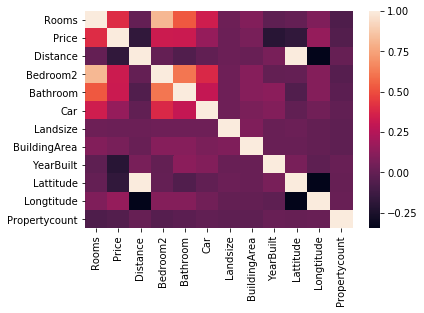

In [466]:
#show a heatmap of predictor variables to determine how much correlation you have between your variables
sns.heatmap(new_data.corr())

In [467]:
#let's define our X predictor variable and Y outcome variable 
X = new_data[['Rooms','Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize','BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount']]
y = new_data[['Price']]

In [468]:
#make categorical values into dummy values where applicable
X = pd.concat([X, pd.get_dummies(new_data['Regionname'],dtype=int)], axis=1)
X = pd.concat([X, pd.get_dummies(new_data['Type'],dtype=int)], axis=1)

In [469]:
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,NONE,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u
0,2,-37.8014,3067,2.0,1.0,1.0,126.0,160.2564,1970.0,-37.8014,...,0,1,0,0,0,0,0,1,0,0
1,2,-37.7996,3067,2.0,1.0,1.0,202.0,160.2564,1970.0,-37.7996,...,0,1,0,0,0,0,0,1,0,0
2,2,-37.8079,3067,2.0,1.0,0.0,156.0,79.0000,1900.0,-37.8079,...,0,1,0,0,0,0,0,1,0,0
3,3,-37.8114,3067,3.0,2.0,1.0,0.0,160.2564,1970.0,-37.8114,...,0,1,0,0,0,0,0,0,0,1
4,3,-37.8093,3067,3.0,2.0,0.0,134.0,150.0000,1900.0,-37.8093,...,0,1,0,0,0,0,0,1,0,0


In [470]:
X.dtypes

Rooms                           int64
Distance                      float64
Postcode                       object
Bedroom2                      float64
Bathroom                      float64
Car                           float64
Landsize                      float64
BuildingArea                  float64
YearBuilt                     float64
Lattitude                     float64
Longtitude                    float64
Propertycount                 float64
Eastern Metropolitan            int64
Eastern Victoria                int64
NONE                            int64
Northern Metropolitan           int64
Northern Victoria               int64
South-Eastern Metropolitan      int64
Southern Metropolitan           int64
Western Metropolitan            int64
Western Victoria                int64
h                               int64
t                               int64
u                               int64
dtype: object

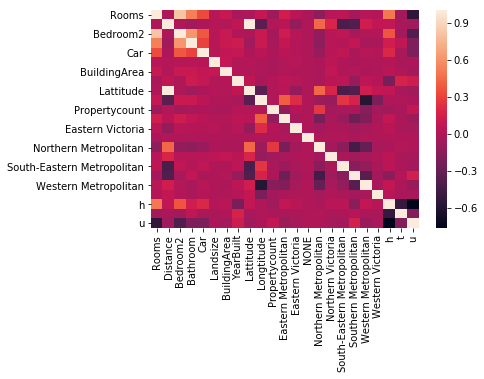

In [471]:
#show a heatmap of predictor variables to determine how much correlation you have between your variables
sns.heatmap(X.corr())

In [472]:
#based on the heatmap I think it would be best to start with a Lasso or ridge regression model 

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

from sklearn import linear_model
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
#y = y.reshape(1,-1)
#X = X.reshape(1,-1)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(ridgeregr, X, y, cv=5)
print('\n Percentage accuracy of X and Y is: ', cv_results)

ridgeregr.fit(X, y)

print("The R2 score is: ", ridgeregr.score(X, y))
origparams = ridgeregr.coef_[0]
print("The regression coeffients are:", origparams)

pred_y_sklearn = ridgeregr.predict(X) #use for just X

print('\n Accuracy by house price predicition')
#print(pd.crosstab(pred_y_sklearn, y))
print('Predictions of new values of X for house prices:',pred_y_sklearn )


 Percentage accuracy of X and Y is:  [0.38095531 0.35169805 0.34548645 0.29533889 0.352266  ]
The R2 score is:  0.3676151813452069
The regression coeffients are: [ 1.55689494e+05 -2.55209645e+05 -4.91486873e+02 -5.26457525e+04
  1.60616186e+05  1.60350664e+04  3.94330709e+00  3.92728175e+01
 -3.06700142e+03 -2.55209644e+05 -7.92720667e+04 -3.19757183e+00
  1.33640170e+05 -5.13613646e+04 -1.29843981e+05  7.29576399e+04
 -8.79883412e+04 -3.46023818e+04  4.23253809e+05 -7.68756725e+04
 -2.72416954e+05  1.47531590e+05 -1.99079583e+04 -1.50860709e+05]

 Accuracy by house price predicition
Predictions of new values of X for house prices: [[ 848231.44295441]
 [ 847406.27219978]
 [1047321.58602936]
 ...
 [ 492490.36956809]
 [ 933572.52461117]
 [ 838385.832694  ]]


In [473]:
#Let's use Lasso and compare it to Ridge and determine if our accuracy score is better, equal or worse
#Using Lasso runs really slow response, not sure what is wrong
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)

X_train, Y_train = X,y

lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.36829002331198213

Parameter estimates for the model with few features:
[ 1.56517156e+05 -5.62677149e+05 -5.05345406e+02 -5.39583185e+04
  1.59958886e+05  1.57241583e+04  4.04098546e+00  4.04294387e+01
 -3.01597493e+03 -6.72284933e+03  1.19508778e+05 -3.17405834e+00
 -3.48393325e+04 -2.56026763e+05 -7.20226328e+05 -6.85676980e+04
 -1.98005029e+05 -2.12378814e+05  2.69681764e+05 -1.99272998e+05
 -3.54492110e+05  2.58386076e+05  8.94668063e+04 -4.03064217e+04
 -3.10716926e+07]


In [474]:
#Use a decision tree regression model and compare if the results from ridge regression and see which performs the best

from sklearn.tree import DecisionTreeRegressor

#increasing the max_depth is improving the accuracy. I initally started with 3 with a 60% accuracy
#increased it to 5 with a 83% accurracy
#increased it to 7 with a 94% accurracy
regressor = DecisionTreeRegressor(max_depth=7)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(regressor, X, y, cv=5)
print('\n Percentage accuracy of X and Y cross validation results are : ', cv_results)

regressor.fit(X, y)

#score = cross_val_score(regressor, X_test, y_test)
score = regressor.score(X, y)

print("The overal R2 score is: ",score) 


 Percentage accuracy of X and Y cross validation results are :  [0.3449892  0.36275929 0.40479774 0.4127297  0.41331662]
The overal R2 score is:  0.47391042994730315


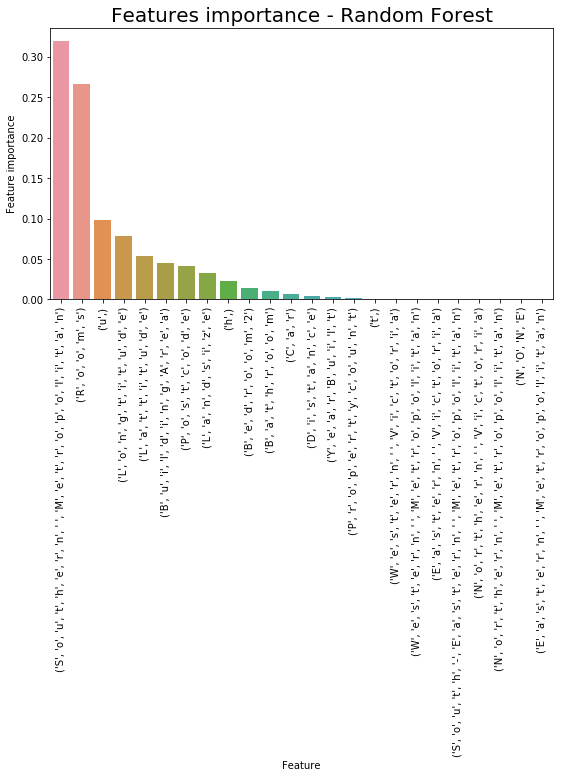

In [475]:
#Let's review the list of important features that Random forest selected.
features = X

plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': regressor.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

In [ ]:
#I have used the models of ridge, lasso and decission tree regressor and my overall score is not higher
#than 46%. clearly I need to perform more feature engineering 